📑 Logistic Regression & Decision Boundaries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# To Load Titanic dataset
titanic = sns.load_dataset("titanic").dropna(subset=['age','fare','sex','survived'])

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.shape

(714, 15)

In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# To Select features
X = titanic[['age', 'fare', 'sex']]
y = titanic['survived']

In [ ]:
# To Encode categorical column 'sex'
X['sex'] = LabelEncoder().fit_transform(X['sex'])

C:\Users\Sreeja S\AppData\Local\Temp\ipykernel_3044\2788774612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = LabelEncoder().fit_transform(X['sex'])


In [9]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# To Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# For Model Evaluation
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[103  23]
 [ 28  61]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       126
           1       0.73      0.69      0.71        89

    accuracy                           0.76       215
   macro avg       0.76      0.75      0.75       215
weighted avg       0.76      0.76      0.76       215



👨‍💻 Visualizing Decision Boundary

In [13]:
# Using only 2 features for visualization
X2 = titanic[['age', 'fare']]
y2 = titanic['survived']
X2_scaled = scaler.fit_transform(X2)

model2 = LogisticRegression()
model2.fit(X2_scaled, y2)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


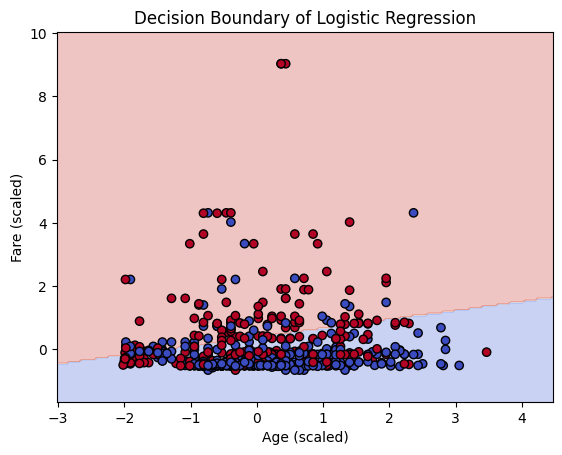

In [14]:
# Plotting decision boundary
x_min, x_max = X2_scaled[:,0].min()-1, X2_scaled[:,0].max()+1
y_min, y_max = X2_scaled[:,1].min()-1, X2_scaled[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X2_scaled[:,0], X2_scaled[:,1], c=y2, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel("Age (scaled)")
plt.ylabel("Fare (scaled)")
plt.title("Decision Boundary of Logistic Regression")
plt.show()

🔎Points: Individual passengers

Red dots = one class (e.g., Did not survive)

Blue dots = other class (e.g., Survived)

🔎Shaded regions: Model’s predicted class

Red region = model predicts Class 0 (did not survive)

Blue region = model predicts Class 1 (survived)

🧠 Interpretation

👉 The model has drawn a linear decision boundary (slightly slanted line).

👉 Passengers in the blue region are predicted as “survived”, while those in the red region are predicted as “not survived.”

👉 Most points cluster near the bottom (low Fare, average Age), where survival and non-survival overlap heavily → the model struggles to separate classes cleanly.

👉 A few passengers with very high fares are classified into the red zone (not survived), which may reflect noise or lack of strong linear separability.